<a href="https://colab.research.google.com/github/shabanakausar/shabanakausar/blob/main/Image_classificationMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.12.0


#Basic classification: Classify images of clothing


In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###  Explore the data


In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_labels)

60000

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
len(test_labels)

10000

## Preprocess the data

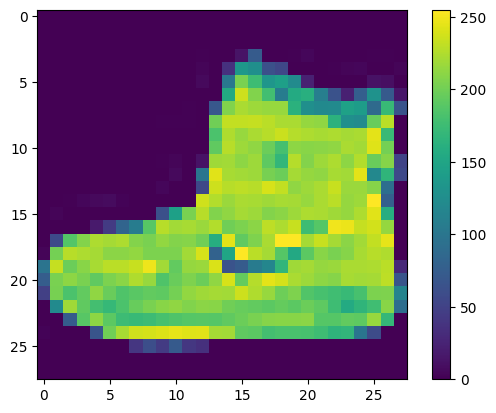

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images = train_images / 255.0

test_images = test_images / 255.0

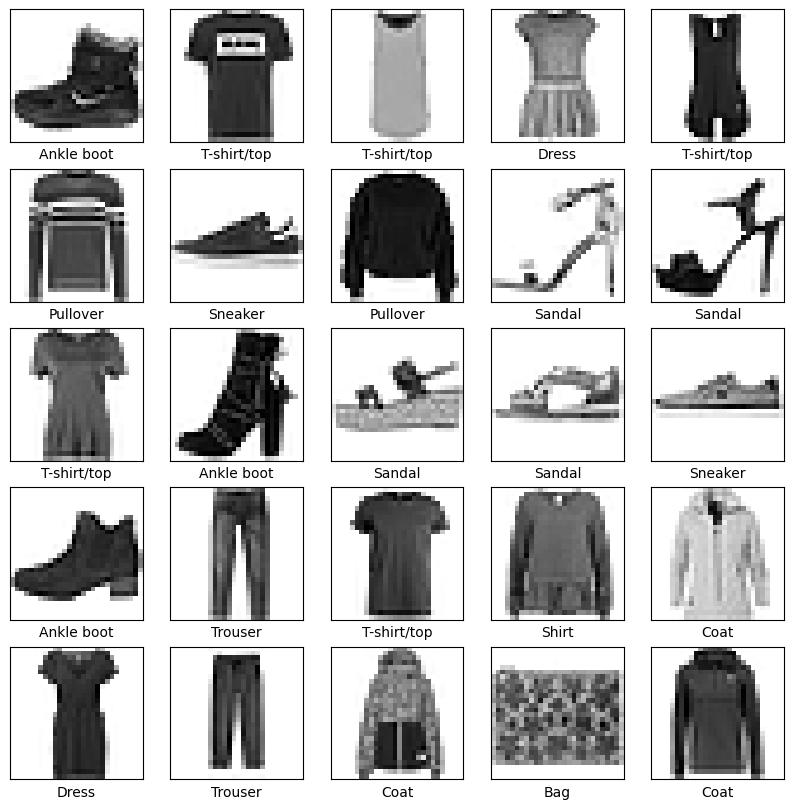

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

In [22]:
# Feed the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4942 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3738 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3371 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3105 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2943 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2804 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2667 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2574 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2458 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2

## Evaluate accuracy


In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3265 - accuracy: 0.8902 - 637ms/epoch - 2ms/step

Test accuracy: 0.8902000188827515


### Make predictions

In [24]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [25]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [26]:
predictions[0]

array([6.38903020e-06, 3.24992616e-10, 1.48786095e-08, 6.40219475e-11,
       2.04299255e-07, 2.97853025e-03, 3.09041553e-07, 5.34429438e-02,
       2.40958107e-05, 9.43547606e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [28]:
test_labels[0]

9

**this to look at the full set of 10 class predictions.**



In [29]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#Verify predictions

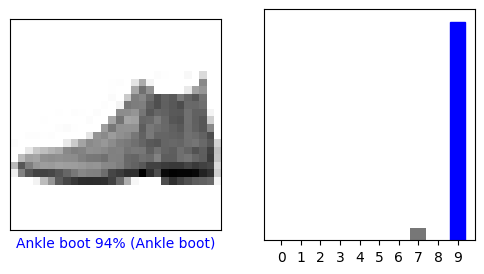

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

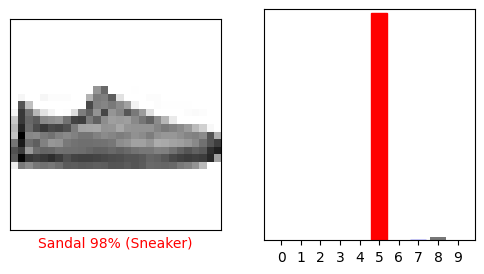

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

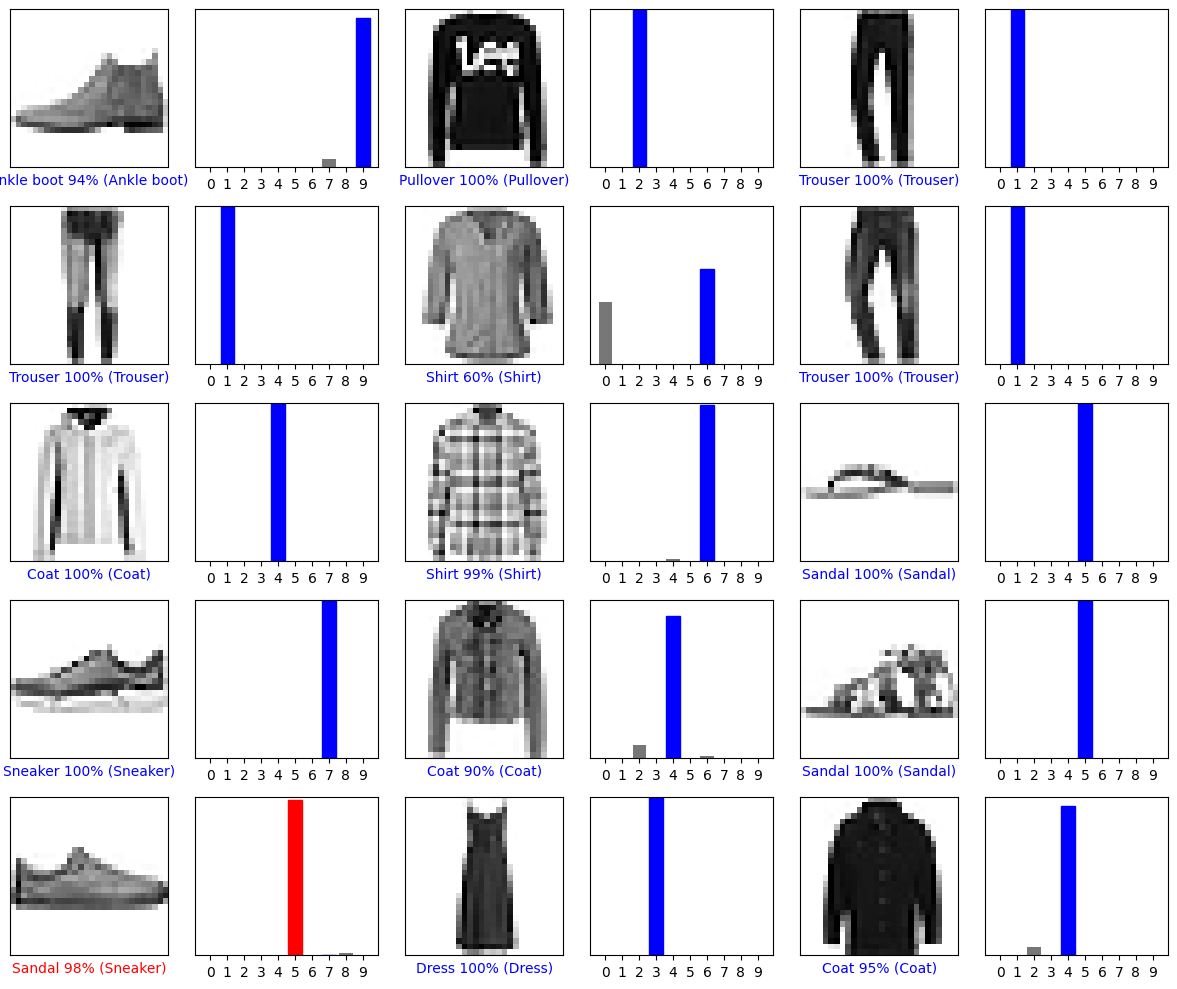

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model
Finally, use the trained model to make a prediction about a single image.



In [33]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [34]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [35]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[2.1105015e-04 6.9032036e-16 9.9821091e-01 4.8252038e-11 1.3826159e-03
  2.8417572e-11 1.9535894e-04 2.0088024e-15 1.7895350e-10 1.1946681e-11]]


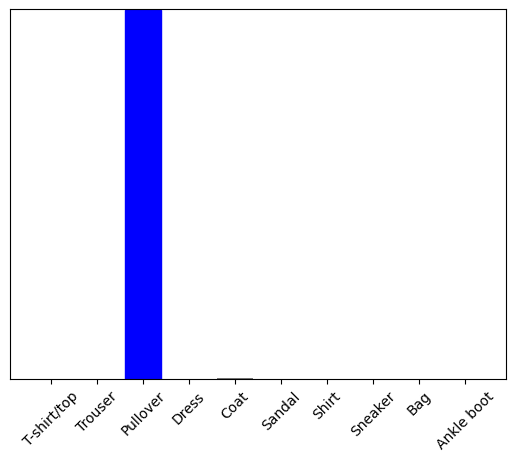

In [36]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [38]:
np.argmax(predictions_single[0])

2